## Question 1
$\frac{\pi_i \mathcal{N}(x ; \mu_i , \Sigma_i))}{\Sigma_{j=1}^{K}\pi_j \mathcal{N}(x ; \mu_j , \Sigma_j)} 
= \exp( \log(\pi_i \mathcal{N}(x ; \mu_i , \Sigma_i)) - \log(\Sigma_{j=1}^{K}\pi_j \mathcal{N}(x ; \mu_j , \Sigma_j)) 
= \exp ( \log ( \pi_i ) + \log( \mathcal{N} (x ; \mu_i , \Sigma_i ) )  - \log ( \Sigma_{j=1}^{K} \pi_j \mathcal{N} ( x ; \mu_j , \Sigma_j ) ) )$


With:

$\mathcal{N}(x ; \mu , \Sigma)) = (2\pi)^{-\frac{k}{2}}\det(\Sigma)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x-\mu))$

$= \exp ( \log ( \pi_i ) + \log( (2\pi)^{-\frac{k}{2}}\det(\Sigma_i)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) )  - \log ( \Sigma_{j=1}^{K} \pi_j (2\pi)^{-\frac{k}{2}}\det(\Sigma_j)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_j)^T {\Sigma_j}^{-1} (x-\mu_j)) ) )$

$= \exp ( \log ( \pi_i ) -\frac{k}{2}\log(2\pi) + {\frac{1}{2}}\log( \det(\Sigma_i)) + (\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) )  - \log ( \Sigma_{j=1}^{K} \pi_j (2\pi)^{-\frac{k}{2}}\det(\Sigma_j)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_j)^T {\Sigma_j}^{-1} (x-\mu_j)) ) )$

We have: $l_i =  \log ( \pi_i ) -\frac{k}{2}\log(2\pi) + {\frac{1}{2}}\log( \det(\Sigma_i)) + (\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) ) $ with $ \det(\Sigma_i) = \Pi {\lambda_i}^k$ where $\{ {\lambda_i}^k \}_k$ are the eigen values of $ \Sigma_i $  

Choleski??

## Question 2

We need to to compute the next step of the parameters of our model: $\pi_{1:K}^{(t+1)}$ $\mu_{1:K}^{(t+1)}$ $\Sigma_{1:K}^{(t+1)}$.

***

### $\mu$

- Let's first compute: $ \nabla_{\mu_i}L_t(\theta) $

$L_t(\mu + h, \theta) = \Sigma_{n=1}^{N} \Sigma_{i=1}^{K} \gamma_{i}^{(t)} (x_n) (\frac{1}{2}\log |\Sigma_i| - \frac{1}{2}(x_n - \mu_i - h)^T \Sigma_{i}^{-1} (x_n - \mu_i - h) ) + cste$

We have:

$(x_n - \mu_i - h)^T \Sigma_{i}^{-1} (x_n - \mu_i - h) = ((x_n - \mu_i)^T - h^T) [\Sigma_{i}^{-1} (x_n - \mu_i) -\Sigma_{i}^{-1} h)]$

$ = (x_n - \mu_i)^T \Sigma_{i}^{-1}  (x_n - \mu_i) - h^T \Sigma_{i}^{-1} (x_n - \mu_i) - (x_n - \mu_i)^T \Sigma_{i}^{-1} h + h^T  \Sigma_{i}^{-1} h - 2 (x_n - \mu_i)^T \Sigma_{i}^{-1} h $

$ \nabla_{\mu_i}L_t(\theta) = \Sigma_{n=1}^{N} \gamma_{i}^{(t)} (x_n - \mu_i)^T \Sigma_{i}^{-1}$


$$ \Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n)x_{n}^{T}\Sigma_{i}^{-1} = \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)\mu_{i}^{T}\Sigma_{i}^{-1} $$

$$ \iff\Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n)x_{n}^{T}\Sigma_{i}^{-1} = \mu_{i}^{T}\Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)\Sigma_{i}^{-1}$$

$$\iff \mu_i = \frac{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)x_n}{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)} $$


***

### $\Sigma$

- Let's focus on $ \nabla_{\Sigma_i}L_t(\theta) $ now.

$L_t(\Sigma + H, \theta) = \Sigma_{n=1}^{N} \Sigma_{i=1}^{K} \gamma_{i}^{(t)}(x_n) [ - \frac{1}{2} \log |\Sigma_i + H| - \frac{1}{2}  (x_n - \mu_i)^T (\Sigma_i + H)^{-1}(x_n - \mu_i))] + \Sigma_{n=1}^{N}\Sigma_{i=1}^{K}\gamma_{i}^{(t)}(x_n)\log(\pi_i) $

$= \Sigma_{n=1}^{N}\Sigma_{k=1}^{K} \gamma_{i}^{(t)}(x_n)[ -\frac{1}{2}\log(| \Sigma_i|) - \frac{1}{2}tr(\Sigma_{i}^{-1}H) +o(||H||) - \frac{1}{2}( (x_n - \mu_i)^T \Sigma_{i}^{-1} (x_n - \mu_i) -  <\Sigma_{i}^{-1}(x_n - \mu_i)(x_n - \mu_i)^T \Sigma_{i}^{-1}, H> +o(||H||))] + \Sigma_{n=1}^{N}\Sigma_{i=1}^{K}\gamma_{i}^{(t)}(x_n)\log(\pi_i)$


We have:

$\det(\Sigma_i + H) 
= \det [\Sigma_i (I + \Sigma_{i}^{-1} H)] = \det (\Sigma_i) \det(I +  \Sigma_{i}^{-1} H)) 
= \det(\Sigma_i)(1 + tr(\Sigma_{i}^{-1}H) + o(||H||))$

and $tr(\Sigma_{i}^{-1}H) = <(\Sigma_{i}^{-1})^T, H>$ 

thus we have:

$\det(\Sigma_i + H) = \det (\Sigma_i) + <\det (\Sigma_i)(\Sigma_{i}^{-1})^T, H> + o(||H||)) $

$\log[\det(\Sigma_i + H)] = \log( \det (\Sigma_i) ) + \log(<\det (\Sigma_i)(\Sigma_{i}^{-1})^T, H>) + o(||H||)) $

<!---
    T'es sur de toi sur le log et le o(||H||)?
-->

    $$\Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n) (-\frac{1}{2}\Sigma_{i}^{-1} + \frac{1}{2}\Sigma_{i}^{-1} (x_n - \mu_i)(x_n - \mu_i)^T \Sigma){i}^{-1}) = 0$$

$$\iff - \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)\Sigma_{i}^{-1} + \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n) \Sigma_{i}^{-1} (x_n - \mu_i)(x_n - \mu_i)^T \Sigma_{i}^{-1} = 0$$

$$\iff \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)\Sigma_{i}^{-1} = \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n) \Sigma_{i}^{-1} (x_n - \mu_i)(x_n - \mu_i)^T \Sigma_{i}^{-1}$$

$$\iff \Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n) = \Sigma_{n=1}^{N}\gamma_{i}^{(t)} (x_n)\Sigma_{i}^{-1} (x_n - \mu_i)(x_n - \mu_i)^T$$

$$\iff \Sigma_{i} = \frac{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n) (x_n - \mu_i)(x_n - \mu_i)^T}{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}(x_n)}$$


***

### $\pi$

We have the constraint on $\pi$ that $\Sigma_{i}\pi_i = 1$

$\forall$ $i$ we will maximize $f(\pi_i, \lambda) = \Sigma_{n=1}^{N}\gamma_{i}^{t}(x_n) \log(\pi_i) + \lambda (\Sigma_{k=1}^{K}\pi_k - 1)$

$\pi_i \in \mathbb{R}$

$f'(\pi_i , \lambda) = \Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n)\frac{1}{\pi_i} + \lambda (\frac{\partial (\Sigma_{k=1}^{K} \pi_k - 1)}{\partial \pi_i}) = \Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n)\frac{1}{\pi_i} + \lambda$

$f'(\pi_i , \lambda) = 0 \iff \Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n) = - \lambda \pi_i$

$\implies \Sigma_{i=1}^{K}( \Sigma_{n=1}^{N} \gamma_{i}^{(t)}(x_n) ) = 
\lambda \Sigma_{i=1}^{K} ( \pi_i )$

$\implies \lambda = - \Sigma_{i=1}^{K}\Sigma_{n=1}^{N}\gamma_{i}^{(t)}$

But $\Sigma_{i=1}^{K} \gamma_{i}^{(t)} = 1$ thus $\lambda = -N$

Then: 

$\Sigma_{n=1}^{N}\gamma_{i}^{(t)}\frac{1}{\pi_i} = N $

$\iff \frac{1}{\pi_i} = \frac{N}{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}}$

$\iff \pi_i = \frac{\Sigma_{n=1}^{N}\gamma_{i}^{(t)}}{N}$


## Question 3
1. First we generate some synthetic data

In [1]:
# Imports
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
# Parameters
N = 1000
K = 3
pis = [0.3, 0.2, 0.5]
mus = [[0, 0], [1, 2], [2, 0]]
sigmas = [
    [[1.00, -0.25],
     [-0.25, 0.50]], 
    [[0.50, 0.25],
     [ 0.25, 0.50]], 
    [[0.50, -0.25],
     [-0.25, 1]]]
assert K == len(pis) == len(mus) == len(sigmas)
assert sum(pis) == 1
assert len(sigmas[0]) == len(sigmas[0][0]) == len(mus[0]) # Must be checked for all i,j

In [3]:
# Data generation
gmm_sample = np.zeros((N, len(mus[0])))  # Initialisation
xis = np.random.multinomial(1, pis, size=N)  # To which gaussian do we belong
xis = np.array(xis, dtype=bool)
for gaussian_idx in range(K):
    gmm_sample[xis[:,gaussian_idx]] = np.random.multivariate_normal(
        mean=mus[gaussian_idx], cov=sigmas[gaussian_idx], size=N)[xis[:,gaussian_idx]]

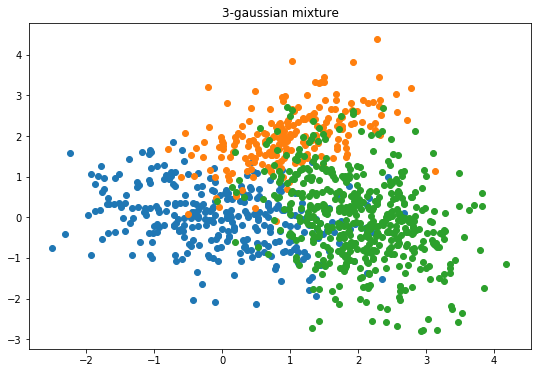

In [4]:
# Plot generated data
plt.figure(figsize=(9,6))
plt.plot()
plt.title("{}-gaussian mixture".format(K))
for gaussian_idx in range(K):
    plt.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]])
plt.show()
plt.close()

- EM Algorithm

In [5]:
"""

K mixtures
N samples
d dimension of the samples

"""

def comp_expectation(data, means, covariances, membership_weights, i, n):
    d = len(data[0])
    eig_values, eig_vectors = np.linalg.eig(covariances[i])
    log_det_sigma = sum([np.log(eig_values[j]) for j in range(len(eig_values))])
    return( np.log(membership_weights[i]) - (d/2)*np.log(np.pi * 2) - (1/2)*log_det_sigma 
            - (1/2)*(data[n]-means[i])[np.newaxis,:].dot(np.linalg.inv(covariances[i]).dot((data[n]-means[i])[:,np.newaxis])) )

def v_i(data, means, covariances, membership_weights, i, n):
    """
    Compute log(Pi_i * N(xn ; mu_i, sigma_i)) in a stable way
    """
    d = len(data[0])
    eig_values, eig_vectors = np.linalg.eig(covariances[i])
    log_det_sigma = sum([np.log(eig_values[j]) for j in range(len(eig_values))])
    return( np.log(membership_weights[i]) - (d/2)*np.log(np.pi * 2) - (1/2)*log_det_sigma
            - (1/2)*(data[n]-means[i])[np.newaxis,:].dot(np.linalg.inv(covariances[i]).dot((data[n]-means[i])[:,np.newaxis])) )

def sum_v_i(data, means, covariances, membership_weights, n):
    """
    Compute sum over i of log(Pi_i * N(xn ; mu_i, sigma_i)) in a stable way
    Log sum exp trick
    """
    K = len(means)
    all_v = [v_i(data, means, covariances, membership_weights, i, n) for i in range(K)]
    max_v = np.max(np.abs(all_v))
    return np.log(np.sum(np.exp(all_v + max_v))) - max_v

def M_step(data, gammas):
    """
    Maximization step
    We try to maximize the parameters given the weights w_ij
    gammas: R^{K*N}
    """
    # Simple variables for computations
    K = len(gammas)
    d = len(data[0])
    N = len(data)   
    
    Nk = gammas.sum(axis=1)

    means = [1/Nk[j] * (np.array([[gammas[i,n]*data[n] for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    covariances = [1/Nk[j] * (np.array([[gammas[i,n]*(data[n]-means[i])[:,np.newaxis].dot((data[n]-means[i])[np.newaxis,:]) for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    pis = Nk/N
    
    return means, covariances, pis

def E_step(data, means, covariances, membership_weights):
    """
    Estimation step
    We compute w_ij given the current parameters
    means: R^{K*d}
    covariances: R^{K*d*d}
    membership_weights: R^{K} ( pi_k )
    """
    # Simple variables for computations
    K = len(membership_weights)
    d = len(data[0])
    N = len(data)
    
    log_normalisation = np.array([sum_v_i(data, means, covariances, membership_weights, n) for n in range(N)])
    log_gamma_k = []
    for gaussian_idx in range(K):
        log_gamma_k.append(np.array([v_i(data, means, covariances, membership_weights, gaussian_idx, n) for n in range(N)]) - log_normalisation)
    
    log_gamma_k = np.array(log_gamma_k)
    gamma_k = np.exp(log_gamma_k)
    
    log_expectation = np.sum([[gamma_k[i,n]*comp_expectation(data, means, covariances, membership_weights, i, n) for i in range(K)] for n in range(N)])
    
    # TODO: Change det to https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.slogdet.html#numpy.linalg.slogdet

    return log_expectation, gamma_k

def EM(data, epsilon, means_0, covariances_0, membership_weights_0):
    """
    EM Algorithm
    epsilon: threshold
    """
    
    delta = 1000
    
    means_t = means_0
    covariances_t = covariances_0
    membership_weights_t = membership_weights_0
    
    value_t_1, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                 membership_weights = membership_weights_t)
    
    while delta > epsilon :
        means_t, covariances_t, membership_weights_t = M_step(data = data, gammas = gammas_t)
        value_t, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                   membership_weights = membership_weights_t)
        delta = value_t - value_t_1
        value_t_1 = value_t
        
    return means_t, covariances_t, membership_weights_t

In [6]:
# UNSTABLE ONE

"""

K mixtures
N samples
d dimension of the samples

"""

def comp_expectation_unstable(data, means, covariances, membership_weights,i,n):
    d = len(data[0])
    return( np.log(membership_weights[i]) - (d/2)*np.log(np.pi * 2) - (1/2)*np.log(np.linalg.det(covariances[i])) 
             - (1/2)*(data[n] - means[i])[np.newaxis,:].dot(np.linalg.inv(covariances[i]).dot((data[n] - means[i])[:,np.newaxis])) )


def M_step_unstable(data, gammas):
    """
    Maximization step
    We try to maximize the parameters given the weights w_ij
    gammas: R^{K*N}
    """
    # Simple variables for computations
    K = len(gammas)
    d = len(data[0])
    N = len(data)   
    
    Nk = gammas.sum(axis=1)

    means = [1/Nk[j] * (np.array([[gammas[i,n]*data[n] for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    covariances = [1/Nk[j] * (np.array([[gammas[i,n]*(data[n]-means[i])[:,np.newaxis].dot((data[n]-means[i])[np.newaxis,:]) for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    pis = Nk/N
    
    return means, covariances, pis

def E_step_unstable(data, means, covariances, membership_weights):
    """
    Estimation step
    We compute w_ij given the current parameters
    means: R^{K*d}
    covariances: R^{K*d*d}
    membership_weights: R^{K} ( pi_k )
    """
    # Simple variables for computations
    K = len(membership_weights)
    d = len(data[0])
    N = len(data)
    
    normalisation = np.array([membership_weights[i]*scipy.stats.multivariate_normal.pdf(gmm_sample, mean=means[i], cov=covariances[i]) for i in range(K)]).sum(axis=0)
    gamma_k = []
    for gaussian_idx in range(K):
        gamma_k.append(membership_weights[gaussian_idx]*scipy.stats.multivariate_normal.pdf(gmm_sample, mean=means[gaussian_idx], cov=covariances[gaussian_idx])/normalisation)
    gamma_k = np.array(gamma_k)
    
    log_exp = np.sum([[gamma_k[i,n]*comp_expectation_unstable(data, means, covariances, membership_weights, i, n) for i in range(K)] for n in range(N)])
    
    # TODO: Change det to https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.slogdet.html#numpy.linalg.slogdet
    
    return log_exp, gamma_k

def EM(data, epsilon, means_0, covariances_0, membership_weights_0):
    """
    EM Algorithm
    """
    
    delta = 1000
    
    means_t = means_0
    covariances_t = covariances_0
    membership_weights_t = membership_weights_0
    
    value_t_1, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                 membership_weights = membership_weights_t)
    
    while delta > epsilon :
        means_t, covariances_t, membership_weights_t = M_step(data = data, gammas = gammas_t)
        value_t, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                               membership_weights = membership_weights_t)
        delta = value_t - value_t_1
        value_t_1 = value_t
    return means_t, covariances_t, membership_weights_t

In [7]:
value, gammas = E_step(data=gmm_sample,
                       means=np.array(mus), 
                       covariances=np.array(sigmas),
                       membership_weights=np.ones(3)/3)

In [8]:
value_u, gammas_u = E_step_unstable(data=gmm_sample,
                       means=np.array(mus), 
                       covariances=np.array(sigmas),
                       membership_weights=np.ones(3)/3)

In [16]:
(np.ones(3)/3)[1]*scipy.stats.multivariate_normal.pdf(gmm_sample, mean=np.array(mus)[1], cov=np.array(sigmas)[1])

array([3.29026237e-09, 7.55969489e-02, 4.77784500e-02, 9.71445104e-02,
       1.41333711e-15, 3.46007887e-06, 9.18878238e-02, 6.15272287e-02,
       3.22814102e-04, 9.76290320e-03, 1.31603642e-03, 1.71806630e-03,
       2.16981839e-05, 4.99930823e-07, 7.78182226e-03, 6.50640970e-13,
       3.09462400e-02, 4.32635163e-06, 2.60421762e-03, 2.94810921e-21,
       3.23284941e-04, 4.23749616e-16, 2.38920089e-10, 6.33083200e-04,
       9.97802188e-07, 1.46571168e-11, 2.97410770e-11, 1.37069309e-08,
       6.89156895e-11, 1.86059872e-03, 9.43992493e-03, 6.56648000e-02,
       2.35176789e-02, 6.46650128e-02, 2.42959721e-06, 1.38258752e-03,
       4.18304128e-11, 8.74091100e-02, 3.07709503e-04, 2.52236880e-09,
       1.83047654e-04, 1.20773676e-02, 1.97159472e-05, 1.55962685e-11,
       2.27876058e-05, 1.49356699e-09, 1.40169361e-07, 6.83800798e-03,
       3.16877152e-10, 1.36635415e-02, 2.78206083e-02, 5.52854833e-04,
       1.42621499e-17, 3.07804853e-04, 2.46387048e-02, 1.70180022e-11,
      

In [18]:
np.exp([v_i(gmm_sample, np.array(mus), np.array(sigmas), np.ones(3)/3, 1, n) for n in range(N)])

array([[[3.29026237e-09]],

       [[7.55969489e-02]],

       [[4.77784500e-02]],

       [[9.71445104e-02]],

       [[1.41333711e-15]],

       [[3.46007887e-06]],

       [[9.18878238e-02]],

       [[6.15272287e-02]],

       [[3.22814102e-04]],

       [[9.76290320e-03]],

       [[1.31603642e-03]],

       [[1.71806630e-03]],

       [[2.16981839e-05]],

       [[4.99930823e-07]],

       [[7.78182226e-03]],

       [[6.50640970e-13]],

       [[3.09462400e-02]],

       [[4.32635163e-06]],

       [[2.60421762e-03]],

       [[2.94810921e-21]],

       [[3.23284941e-04]],

       [[4.23749616e-16]],

       [[2.38920089e-10]],

       [[6.33083200e-04]],

       [[9.97802188e-07]],

       [[1.46571168e-11]],

       [[2.97410770e-11]],

       [[1.37069309e-08]],

       [[6.89156895e-11]],

       [[1.86059872e-03]],

       [[9.43992493e-03]],

       [[6.56648000e-02]],

       [[2.35176789e-02]],

       [[6.46650128e-02]],

       [[2.42959721e-06]],

       [[1.38258752e

In [14]:
np.exp(np.array([sum_v_i(gmm_sample, np.array(mus), np.array(sigmas), np.ones(3)/3, n) for n in range(N)]))

array([0.0365718 , 0.08155228, 0.07658693, 0.10943736, 0.00027352,
       0.06087194, 0.09699847, 0.07830719, 0.08201316, 0.00986831,
       0.08148343, 0.07968545, 0.01587381, 0.00200013, 0.00812562,
       0.02696024, 0.03178946, 0.05054908, 0.0643336 , 0.00297911,
       0.07522918, 0.00693955, 0.00331883, 0.07408711, 0.07837271,
       0.03917555, 0.03727123, 0.06530143, 0.03981903, 0.06826681,
       0.00948284, 0.07244071, 0.0618964 , 0.08579248, 0.02717504,
       0.06284948, 0.04388149, 0.09031089, 0.0635874 , 0.04769969,
       0.01517599, 0.05902922, 0.04376078, 0.02387656, 0.08168702,
       0.05525469, 0.07965715, 0.06121257, 0.00204625, 0.01383986,
       0.04788731, 0.07859328, 0.0026386 , 0.07192957, 0.06271544,
       0.03093785, 0.00269747, 0.12595192, 0.0411483 , 0.06502557,
       0.07105347, 0.04926393, 0.09407019, 0.00350422, 0.03321061,
       0.06012634, 0.05415415, 0.07631731, 0.06443147, 0.06597578,
       0.02009619, 0.06734945, 0.02979367, 0.10356409, 0.03746

In [15]:
np.array([(np.ones(3)/3)[i]*scipy.stats.multivariate_normal.pdf(gmm_sample, mean=np.array(mus)[i], cov=np.array(sigmas)[i]) for i in range(3)]).sum(axis=0)

array([0.0365718 , 0.08155228, 0.07658693, 0.10943736, 0.00027352,
       0.06087194, 0.09699847, 0.07830719, 0.08201316, 0.00986831,
       0.08148343, 0.07968545, 0.01587381, 0.00200013, 0.00812562,
       0.02696024, 0.03178946, 0.05054908, 0.0643336 , 0.00297911,
       0.07522918, 0.00693955, 0.00331883, 0.07408711, 0.07837271,
       0.03917555, 0.03727123, 0.06530143, 0.03981903, 0.06826681,
       0.00948284, 0.07244071, 0.0618964 , 0.08579248, 0.02717504,
       0.06284948, 0.04388149, 0.09031089, 0.0635874 , 0.04769969,
       0.01517599, 0.05902922, 0.04376078, 0.02387656, 0.08168702,
       0.05525469, 0.07965715, 0.06121257, 0.00204625, 0.01383986,
       0.04788731, 0.07859328, 0.0026386 , 0.07192957, 0.06271544,
       0.03093785, 0.00269747, 0.12595192, 0.0411483 , 0.06502557,
       0.07105347, 0.04926393, 0.09407019, 0.00350422, 0.03321061,
       0.06012634, 0.05415415, 0.07631731, 0.06443147, 0.06597578,
       0.02009619, 0.06734945, 0.02979367, 0.10356409, 0.03746

In [9]:
value_u

-3480.323326456741

In [10]:
value

-10707056.046257861

In [12]:
gammas[0]

array([[[2.66659722e-02, 1.19582498e-02, 1.27335377e-02, ...,
         6.32595685e-02, 1.42217946e-02, 1.41824865e-02]],

       [[1.51986531e-04, 6.81577592e-05, 7.25766234e-05, ...,
         3.60556980e-04, 8.10591575e-05, 8.08351153e-05]],

       [[3.26522541e-02, 1.46427743e-02, 1.55921076e-02, ...,
         7.74607989e-02, 1.74144655e-02, 1.73663331e-02]],

       ...,

       [[7.96308479e-03, 3.57101390e-03, 3.80253303e-03, ...,
         1.88907910e-02, 4.24696148e-03, 4.23522315e-03]],

       [[1.25318839e+00, 5.61987378e-01, 5.98422642e-01, ...,
         2.97293330e+00, 6.68364452e-01, 6.66517137e-01]],

       [[9.98722692e-02, 4.47873243e-02, 4.76910158e-02, ...,
         2.36926545e-01, 5.32649960e-02, 5.31177751e-02]]])

In [13]:
gammas_u

array([[2.66659722e-02, 6.81577592e-05, 1.55921076e-02, ...,
        1.88907910e-02, 6.68364452e-01, 5.31177751e-02],
       [8.99672043e-08, 9.26975300e-01, 6.23846016e-01, ...,
        4.88024653e-09, 2.73102069e-02, 9.14036569e-01],
       [9.73333938e-01, 7.29565424e-02, 3.60561876e-01, ...,
        9.81109204e-01, 3.04325341e-01, 3.28456559e-02]])

In [16]:
m,c,p = M_step(data=gmm_sample, gammas = gammas)

ValueError: operands could not be broadcast together with shapes (1,1000) (2,) 

In [62]:
x = np.ones((1000, 2))

In [63]:
E_step(data=gmm_sample,
       means=np.array(mus), 
       covariances=np.array(sigmas),
       data_membership_weights=np.ones((1000, 3))/3)

(array([-1.96353428, -2.38718321, -1.96353428]),
 array([[[2.35924316, 0.93248933],
         [2.23242706, 0.88010561],
         [2.59563067, 2.43275724],
         ...,
         [0.91022269, 1.57255203],
         [2.88183663, 0.888772  ],
         [1.68080468, 0.94179825]],
 
        [[2.35924316, 0.93248933],
         [2.23242706, 0.88010561],
         [2.59563067, 2.43275724],
         ...,
         [0.91022269, 1.57255203],
         [2.88183663, 0.888772  ],
         [1.68080468, 0.94179825]],
 
        [[2.35924316, 0.93248933],
         [2.23242706, 0.88010561],
         [2.59563067, 2.43275724],
         ...,
         [0.91022269, 1.57255203],
         [2.88183663, 0.888772  ],
         [1.68080468, 0.94179825]]]),
 None)

In [64]:
x1, x2, x3 = _

In [66]:
x2.shape

(3, 1000, 2)

In [60]:
np.array(mus).shape

(3, 2)

In [50]:
def fun(x):
    return 4 

In [51]:
x=np.ones((3,5))